## **IMPORTANDO BASE DE DADOS**

In [348]:
import pandas as pd

In [349]:
import seaborn as sns

In [350]:
sns.__version__

'0.11.2'

In [351]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, pandas, numpy, matplotlib
Required-by: missingno


In [352]:
pd.read_csv('tips.csv') #ler o arquivo csv tips

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [353]:
dados = pd.read_csv('tips.csv') #armazenando como variavel

In [354]:
dados.head() #CMD head, mostra as 5 primeiras linhas do dataframe, mas se colocar algum numero, ira mostrar a quantidade selecionada)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## **MUDADANDO VALORES DE COLUNAS E CELULAS**

In [436]:
#alterando os nomes da colunas
dados.columns #pesquisando todos os nomes de colunas atual

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [437]:
renomear = {  #defini a variavel renomear e o que ela faz
    'total_bill' : 'valor_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia',
    'time' : 'periodo',
    'size' : 'pessoas'
}

In [438]:
type(dados) #ver qual o tipo de dados (nessa caso é do tipo dataframe)

pandas.core.frame.DataFrame

In [439]:
#Renomear a variavel dados, CMD dados.rename e depois seleciono o que quero renomear e por qual variavel vou mudar
gorjetas = dados.rename(columns = renomear)

In [440]:
dados.head(1) #variavel com o nome original

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2


In [441]:
gorjetas.head(1) #variavel renomeada

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [442]:
#renomear os campos dentro da planilha
gorjetas.sobremesa.unique() #dentro da variavel gorjetas procuro quais os tipos de dados existentes na coluna sobremesa

array(['No', 'Yes'], dtype=object)

In [443]:
sim_nao = { #definindo o nomes da variavel para alterar depois
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [444]:
gorjetas.sobremesa.map(sim_nao) #CMD map para mapear na coluna sobremesa o que foi alterado, porem ainda não será alterado na planilha

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [445]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao) #defini que a coluna sobremesa será alterada

In [446]:
gorjetas.head(1) #verificando o que alterei (nesse caso a coluna sobremesa)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [447]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [448]:
#Utilizado o exemplo anterior para alterar os dados da coluna dia
dia_semana = {
    'Sun' : 'Dom',
     'Sat' : 'Sab',
     'Thur' : 'Qui',
     'Fri' : 'Sex'
}

gorjetas.dia.map(dia_semana)
gorjetas.dia = gorjetas.dia.map(dia_semana)
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,Não,Dom,Dinner,2


In [449]:
gorjetas.periodo.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [450]:
#Utilizado o exemplo anterior para alterar os dados da coluna periodo
refeiçao = {
    'Dinner' : 'Jantar',
     'Lunch' : 'Almoço',
}

gorjetas.periodo.map(refeiçao)
gorjetas.periodo = gorjetas.periodo.map(refeiçao)
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,Não,Dom,Jantar,2


In [451]:
gorjetas.head(7) #como ficou ao final

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,Não,Dom,Jantar,2
1,10.34,1.66,Não,Dom,Jantar,3
2,21.01,3.50,Não,Dom,Jantar,3
3,23.68,3.31,Não,Dom,Jantar,2
4,24.59,3.61,Não,Dom,Jantar,4
5,25.29,4.71,Não,Dom,Jantar,4
6,8.77,2.00,Não,Dom,Jantar,2


In [452]:
gorjetas.tail() #exibe os ultimos dados

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas
3411,26.330845,4.729032,Não,Sab,Jantar,3
3412,25.531567,1.604021,Sim,Sab,Jantar,2
3413,21.547132,1.733914,Sim,Sab,Jantar,2
3414,18.966233,1.718951,Não,Sab,Jantar,2
3415,18.079740,2.812176,Não,Qui,Jantar,2


In [453]:
gorjetas.shape #exibe quantas linha e colunas existe

(3416, 6)

In [454]:
#Comando deletar 1 coluna da planilha
#gorjetas.drop('dia', axis=1)

## **ANALISANDO E RELACIONANDO DADOS  - VALOR DA CONTA E GORJETA**

In [455]:
gorjetas.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia', 'periodo', 'pessoas'], dtype='object')

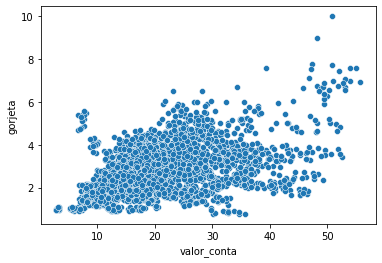

In [456]:
valor_gorjeta = sns.scatterplot( #defino a variavel e o tipo do grafico
    x= 'valor_conta', #defino o que vai no eixo X
    y= 'gorjeta', #defino o que vai no eixo Y
    data = gorjetas #Defino de onde serão retiradas as informações
     )

visualmente o valor da gorjeta, aumenta conforme o valor da conta

In [457]:
gorjetas.shape[0] #visualizar quanitidade de registros na base de dados

3416

In [458]:
#visualizar quantos registros sao nulos
print(f'A base de dados contem {gorjetas.shape[0]} registros \n')
print('Registros não nulos')
gorjetas.count() #vai contar todos registros em todas as colunas

A base de dados contem 3416 registros 

Registros não nulos


valor_conta    3416
gorjeta        3416
sobremesa      3416
dia            3416
periodo        3416
pessoas        3416
dtype: int64

Analisando aqui, vemos que nosso grafico anterior nao possui nenhum dado faltando

## **CRIANDO UMA NOVA COLUNA DO DF**

In [459]:
#Definindo o nome da nova coluna
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_conta'] #criando uma nova coluna com base no calculo da coluna gorjeta / valor da conta

In [460]:
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.059447


In [461]:
#arredondar o campo
gorjetas.porcentagem = gorjetas.porcentagem.round(2) #selecionado a df gorjetas e a coluna porcentagem e definindo os novos dados
#definindo o numero de casas apos a virgula
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06


## **ANALISANDO DADOS GRAFICAMENTE**

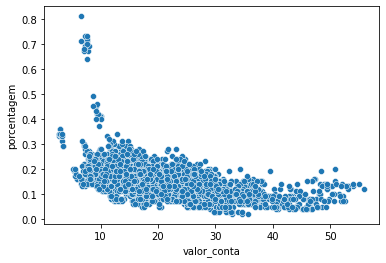

In [462]:
porcentagem_conta = sns.scatterplot(
    x= 'valor_conta',
    y= 'porcentagem',
    data = gorjetas
)

comparando e relaçao entre o valor da conta com a porcentagem das gorjetas

Ou seja

quanto maior a conta, maior é a gorjeta (visto no grafico anterior), porem, quanto maior a conta menor é a proporçao da gorjeta

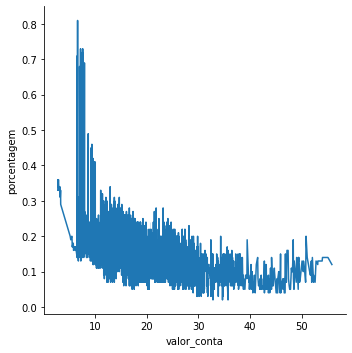

In [463]:
porcentagem_conta_linha = sns.relplot(
    x= 'valor_conta',
    y= 'porcentagem',
    data = gorjetas,
    kind = 'line' #no grafico relplot tem que ser definido o tipo, neste caso o tipo linha
)

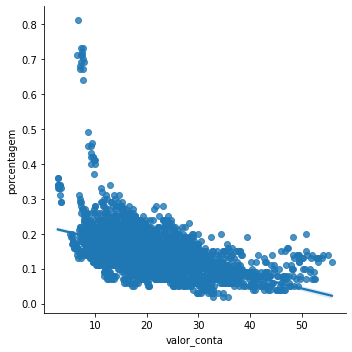

In [464]:
porcentagem_conta_ref = sns.lmplot (
    x= 'valor_conta',
    y= 'porcentagem',
    data = gorjetas,
)

Verifica-se uma tendencia de queda conforme aumenta o valor da conta

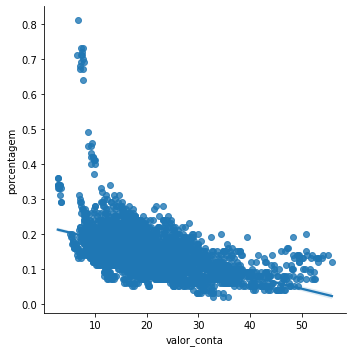

In [465]:
porcentagem_conta_ref.figure.suptitle('Relaçao Valor da conta X Porcentagem')
porcentagem_conta_ref = sns.lmplot (
    x= 'valor_conta',
    y= 'porcentagem',
    data = gorjetas,
)

In [466]:
gorjetas.head(2)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16


In [467]:
 #relaçao de sobremesas com gorjetas
 gorjetas[gorjetas.sobremesa == 'Sim'].describe() #selecionando somente os que pediram sobremesa[]
 #CMD describe vai descrver sobre o DF, nesse caso as que contenham sim na sobremesa

,valor_conta,gorjeta,pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


dos 244, 93 pediram sobremesa / 
media / 
std = desvio padrao / 
min = menor valor encontrado / 
max = maior valor encontrado

In [468]:
gorjetas[gorjetas.sobremesa == 'Não'].describe() #selecionando somente os que NÃO pediram sobremesa[]
 #CMD describe vai descrver sobre o DF, nesse caso as que contenham Não na sobremesa

,valor_conta,gorjeta,pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


In [469]:
151+93

244

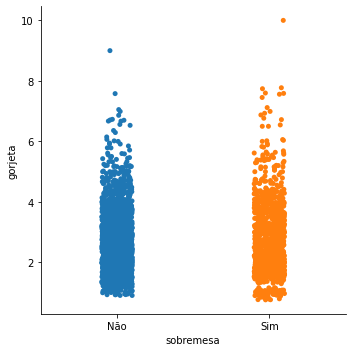

In [470]:
sns.catplot( #grafico categorico
    x='sobremesa',
    y='gorjeta',
    data = gorjetas
)

mas qual sera a relaçao entre pedir ou não a sobremesa?

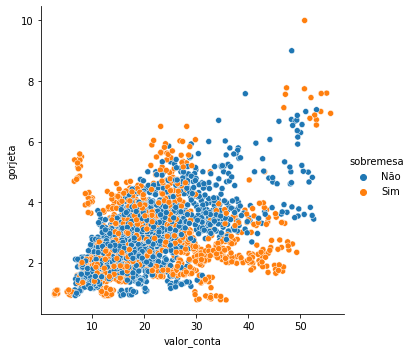

In [471]:
#relacionar agora o valor da conta com o valor da gorjeta
sns.relplot(
    x= 'valor_conta',
    y= 'gorjeta',
    data = gorjetas,
    hue = 'sobremesa' #legenda com base em coluna existente, que mostra os dados do hue considerando X e Y
)

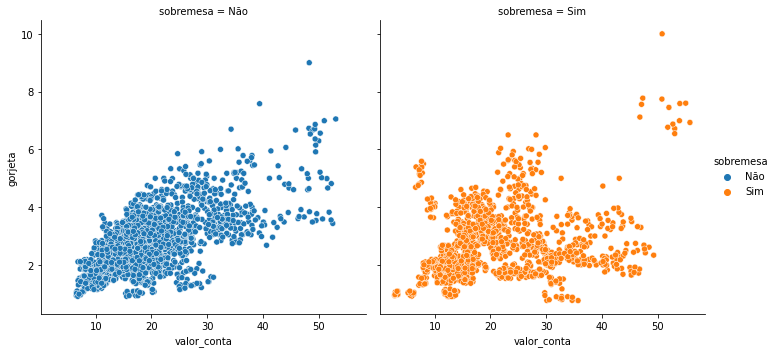

In [472]:
#relacionar agora o valor da conta com o valor da gorjeta
sns.relplot(
    x= 'valor_conta',
    y= 'gorjeta',
    data = gorjetas,
    col= 'sobremesa', #faz um grafico para cada dado da coluna selecionada
    hue = 'sobremesa' #legenda com base em coluna existente, que mostra os dados do hue considerando X e Y
)

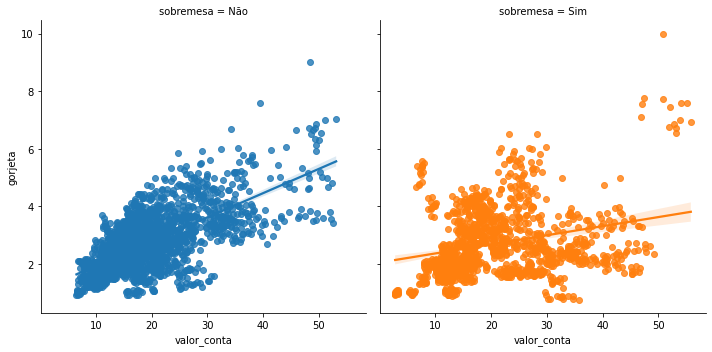

In [473]:
sns.lmplot(
    x= 'valor_conta',
    y= 'gorjeta',
    data = gorjetas,
    col= 'sobremesa', #faz um grafico para cada dado da coluna selecionada
    hue = 'sobremesa' #legenda com base em coluna existente, que mostra os dados do hue considerando X e Y
)

quem nao pede sobremesa, tende a dar mais gorjetas conforme o valor da refeição, pode ser que seja para compensar.

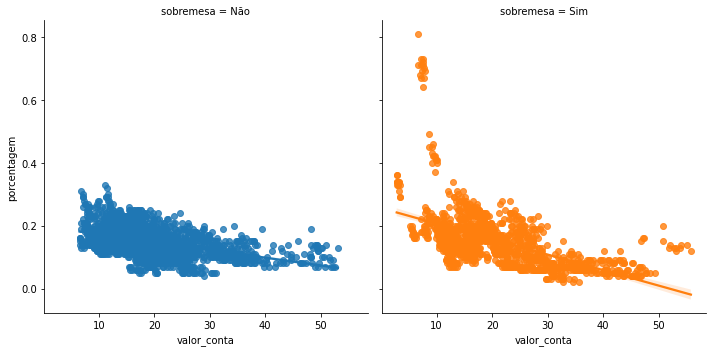

In [474]:
sns.lmplot(
    x= 'valor_conta',
    y= 'porcentagem',
    data = gorjetas,
    col= 'sobremesa',
    hue = 'sobremesa' 
)

quanto maior o valor da conta, menor é a porcentagem da gorgeta, porem quem come sobremesa a gorjeta tem uma porcentagem menor

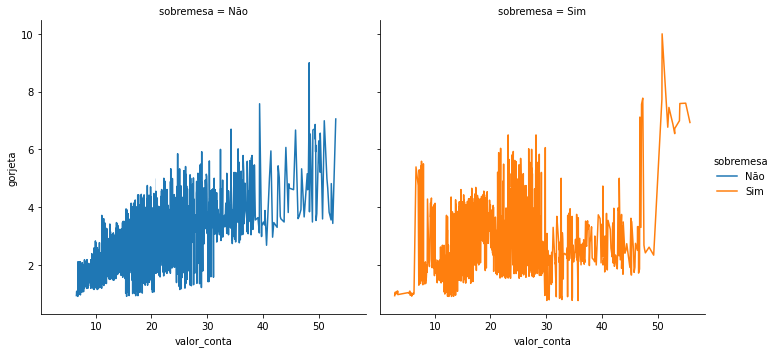

In [475]:
sns.relplot(
    x= 'valor_conta',
    y= 'gorjeta',
    data = gorjetas,
    col= 'sobremesa', #faz um grafico para cada dado da coluna selecionada
    hue = 'sobremesa', #legenda com base em coluna existente, que mostra os dados do hue considerando X e Y
    kind = 'line'
)

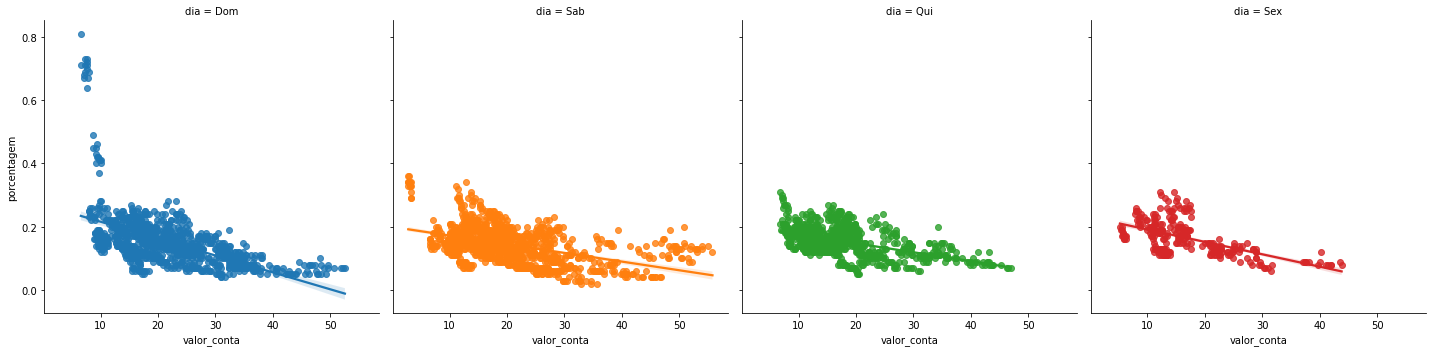

In [476]:
sns.lmplot(
    x= 'valor_conta',
    y= 'porcentagem',
    data = gorjetas,
    col= 'dia',
    hue = 'dia' 
) #analisando como é a gorjeta por dia da semana

In [477]:
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06


## **TESTANDO HIPOTESE**

In [478]:
gorjetas.head(2)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16


**H<sup>null</sup>**
>**A distribuiçao da taxa gorjeta é a mesma dos dois grupos**

**H<sup>alt</sup>**
>**A distribuiçao da taxa gorjeta não é a mesma dos dois grupos**

In [479]:
#acima criei os testes de hipoteses, agora iremos importar a biblioteca ranksums
from scipy.stats import ranksums

In [480]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem #vai retornar todas as porcentagens somente dos que pegaram sobremesa

In [481]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem #vai retornar todas as porcentagens somente dos que pegaram sobremesa

In [482]:
ranksums(sobremesa, sem_sobremesa) #realiza uma comparaçao entre as variaveis

RanksumsResult(statistic=-2.130334422180308, pvalue=0.033144013617673405)

In [483]:
#pvalue é o nivel de significancia (neste exemplo a baixo, tem um total de 53%)
r = ranksums(sobremesa, sem_sobremesa) #realiza uma comparaçao entre as variaveis
print (f'valor de pvalue é = {r.pvalue.round(2)}')

valor de pvalue é = 0.03


**H<sup>null</sup>**
>**A distribuiçao da taxa gorjeta é a mesma dos dois grupos**

pvalue indica que apesar da relacao de gorjetas entre sim e não, matematicamente não é tão relevante

nesse caso, iremos considerar a hipotese nula

In [484]:
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06


**ANALISAR DADOS DE ACORDO COM O DIA DA SEMANA**

In [485]:
gorjetas.dia.unique() #ver todas as opçoes desta coluna

array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object)

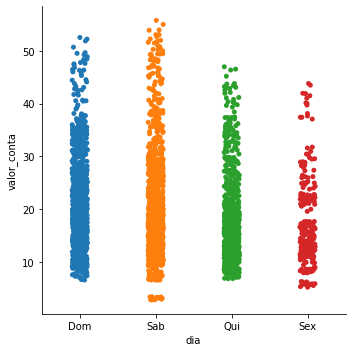

In [486]:
#qual dia da semana as pessoas gastam mais?
sns.catplot( #grafico categorico
    x='dia',
    y='valor_conta',
    data = gorjetas
)

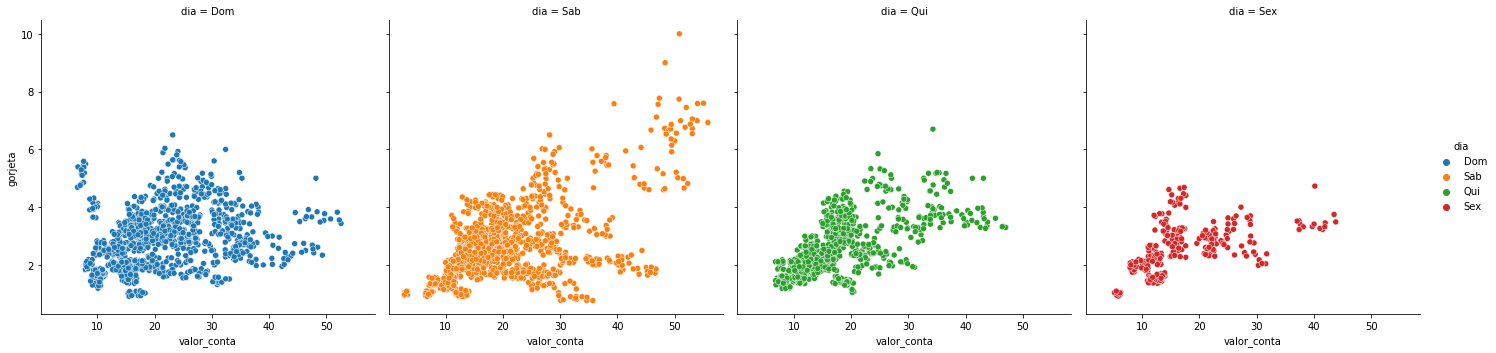

In [487]:
sns.relplot(
    x= 'valor_conta',
    y= 'gorjeta',
    data = gorjetas,
    col= 'dia',
    hue = 'dia' #legenda com base em coluna existente, que mostra os dados do hue considerando X e Y
)

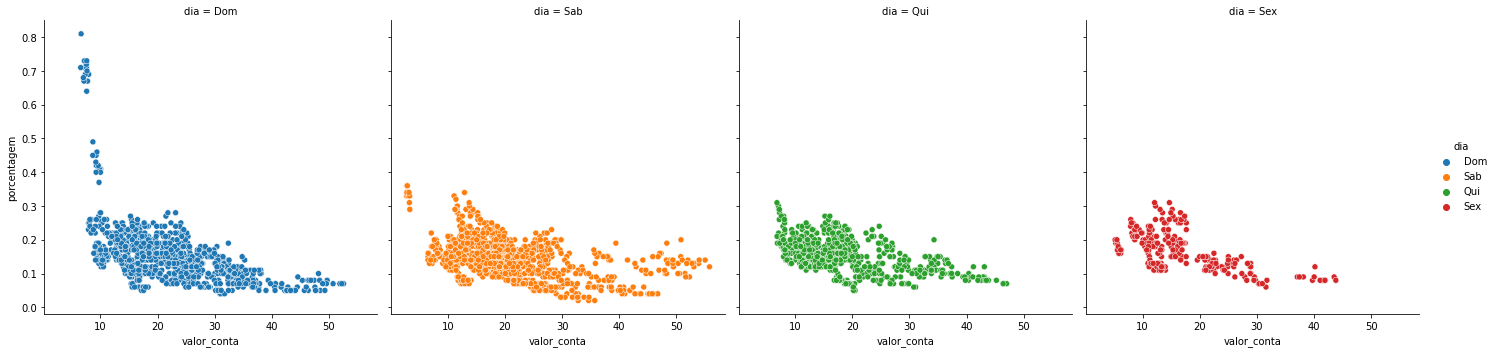

In [488]:
sns.relplot(
    x= 'valor_conta',
    y= 'porcentagem',
    data = gorjetas,
    col= 'dia',
    hue = 'dia' #legenda com base em coluna existente, que mostra os dados do hue considerando X e Y
)

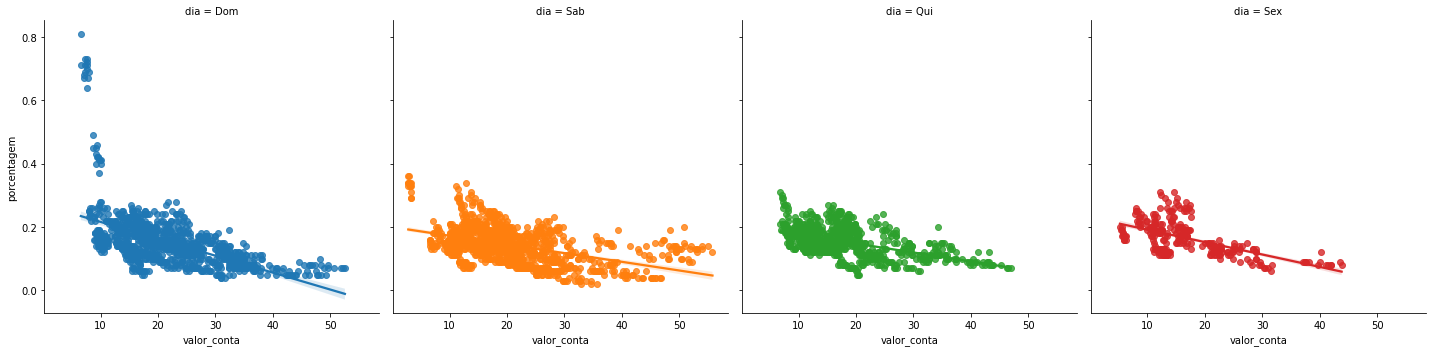

In [489]:
sns.lmplot(
    x= 'valor_conta',
    y= 'porcentagem',
    data = gorjetas,
    col= 'dia',
    hue = 'dia' #legenda com base em coluna existente, que mostra os dados do hue considerando X e Y
)

## **ANALISE DESCRITIVA**

In [490]:
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06


In [491]:
#ver a media das gorjetas

In [492]:
media_geral_gorjeta = gorjetas.gorjeta.mean() #media das gorjetas e definiçao de variavel

In [493]:
print(f'A média geral da gorjeta é = {media_geral_gorjeta.round(3)}')

A média geral da gorjeta é = 2.711


In [494]:
#média geral de cada dia
gorjetas.groupby(['dia']).mean().round(2) #agrupando pela coluna dia, mostra a media dos outros campos.

,valor_conta,gorjeta,pessoas,porcentagem
dia,,,,
Dom,21.44,2.90,2.84,0.15
Qui,17.72,2.56,2.45,0.15
Sab,20.48,2.69,2.52,0.14
Sex,17.22,2.55,2.11,0.16


In [495]:
#Deixar de mostrar algum campo do DF
gorjetas.groupby(['dia']).mean()[['valor_conta', 'gorjeta', 'porcentagem']].round(2) #porque 2 parenteses caixa?

,valor_conta,gorjeta,porcentagem
dia,,,
Dom,21.44,2.90,0.15
Qui,17.72,2.56,0.15
Sab,20.48,2.69,0.14
Sex,17.22,2.55,0.16


In [496]:
#frequencia de cada dia
gorjetas.dia.value_counts() #quantas pessoas frequentam em cada dia da semana

Sab    1218
Dom    1064
Qui     868
Sex     266
Name: dia, dtype: int64

In [497]:
gorjetas.dia[gorjetas.sobremesa == 'Não'].value_counts() #pegando somente os dias que nao pediram sobremesa

Dom    798
Sab    630
Qui    630
Sex     56
Name: dia, dtype: int64

In [498]:
gorjetas.dia[gorjetas.sobremesa == 'Sim'].value_counts() #pegando somente os dias que pediram sobremesa

Sab    588
Dom    266
Qui    238
Sex    210
Name: dia, dtype: int64

sera que o valor da conta do domingo é diferente do sabado?

**H<sup>null</sup>**
>**A distribuiçao da conta é igual no sabado e no domingo**

**H<sup>null</sup>**
>**A distribuiçao da conta não é igual no sabado e no domingo**

In [499]:
gorjetas.query("dia == 'Dom'").valor_conta #estou solicitando que seja mostrado os valores das contas de domningo da coluna dia

0       16.990000
1       10.340000
2       21.010000
3       23.680000
4       24.590000
          ...    
3358    21.989267
3359    32.406667
3360    18.516067
3361    21.521342
3362    14.232724
Name: valor_conta, Length: 1064, dtype: float64

In [500]:
#atribuindo a uma variavel
valor_conta_domingo = gorjetas.query("dia == 'Dom'").valor_conta
valor_conta_sabado = gorjetas.query("dia == 'Sab'").valor_conta

In [501]:
#comparar as duas variaveis acima para ver a relaçao entre elas
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=3.512690684754087, pvalue=0.0004435935681441821)

o resultado do **pvalue foi maior que 0.05**, nesse caso a minha hipotese é nula, caso ela fosse menor que 0.05, então ela seria minha hipotese alternativa

**H<sup>null</sup>**
>**A distribuiçao da conta é igual no sabado e no domingo**

Mesmo no sabado indo mais pessoas e no domingo tendo mais gorjetas, eles não são diferentes.

## **ANALISE HORA DO DIA**

In [502]:
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06


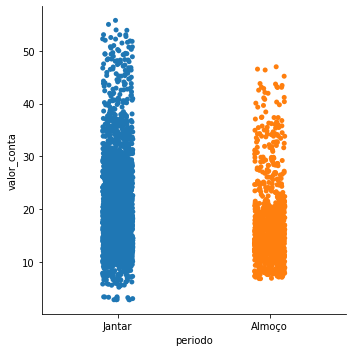

In [503]:
sns.catplot(
    x='periodo',
    y='valor_conta',
    data = gorjetas
)

olhando aqui, tem mais jantar que almoço e o valor tende a se maior tambem

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


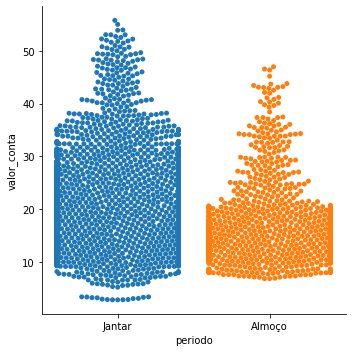

In [504]:
sns.catplot(
    x='periodo',
    y='valor_conta',
    data = gorjetas,
    kind = 'swarm' #organiza para melhor visualizaçao
)

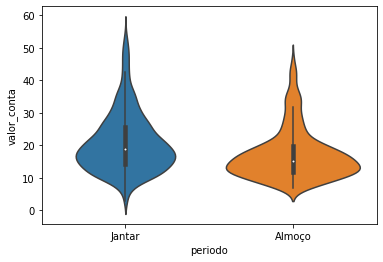

In [505]:
sns.violinplot(
    x='periodo',
    y='valor_conta',
    data = gorjetas
)

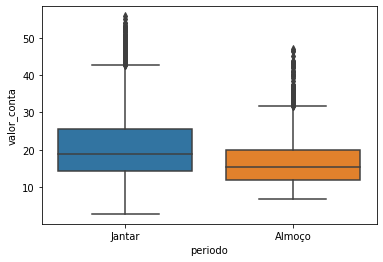

In [506]:
sns.boxplot(
    x='periodo',
    y='valor_conta',
    data = gorjetas
)

In [507]:
#distplot = histograma
#pegar o valor da conta de todos no almoço
gorjetas.query("periodo == 'Almoço'").valor_conta

77      27.200000
78      22.760000
79      17.290000
80      19.440000
81      16.660000
          ...    
3394     8.057385
3395    16.753736
3396    13.334323
3397    15.724707
3398    10.730000
Name: valor_conta, Length: 952, dtype: float64

In [508]:
almoço = gorjetas.query("periodo == 'Almoço'").valor_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


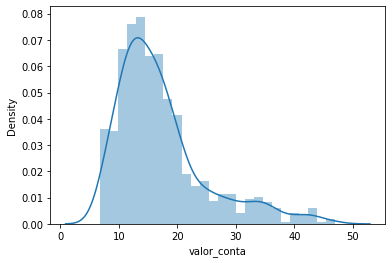

In [509]:
sns.distplot(almoço)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


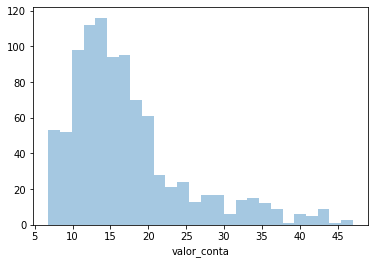

In [510]:
sns.distplot(almoço, kde=False)

In [511]:
#pegar o valor da conta de todos no almoço
jantar = gorjetas.query("periodo == 'Jantar'").valor_conta

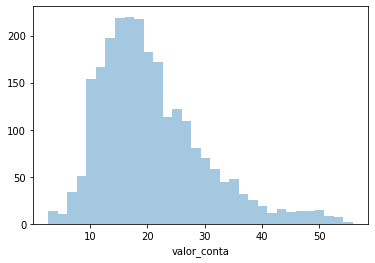

In [512]:
sns.distplot(jantar, kde=False)

Mas será que os valores do sabado é diferente de domingo?

In [513]:
#quero uma descriçao mais numerica, pra saber qual horario tem mais consumo
gorjetas.groupby(['periodo']).mean()[['valor_conta', 'gorjeta', 'porcentagem']].round(2)

,valor_conta,gorjeta,porcentagem
periodo,,,
Almoço,17.21,2.53,0.16
Jantar,20.83,2.78,0.15


In [514]:
ranksums(jantar, almoço)

RanksumsResult(statistic=12.158511455786174, pvalue=5.169201062207143e-34)

podemos aceitar a hipotese alternativa, pois pvalue é menor que 5%. A distribuição entre almoço e jantar são diferentes.

In [515]:
porcentagem_jantar = gorjetas.query("periodo == 'Jantar'").porcentagem
porcentagem_almoço = gorjetas.query("periodo == 'Almoço'").porcentagem

In [516]:
ranksums(porcentagem_almoço, porcentagem_jantar)

RanksumsResult(statistic=6.760141268743677, pvalue=1.3785725618355523e-11)